In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [ ]:
code = "^IXIC"
#begin_time = "2024-09-25"
begin_time = "2025-06-16"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [3]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": True,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 100000},
}


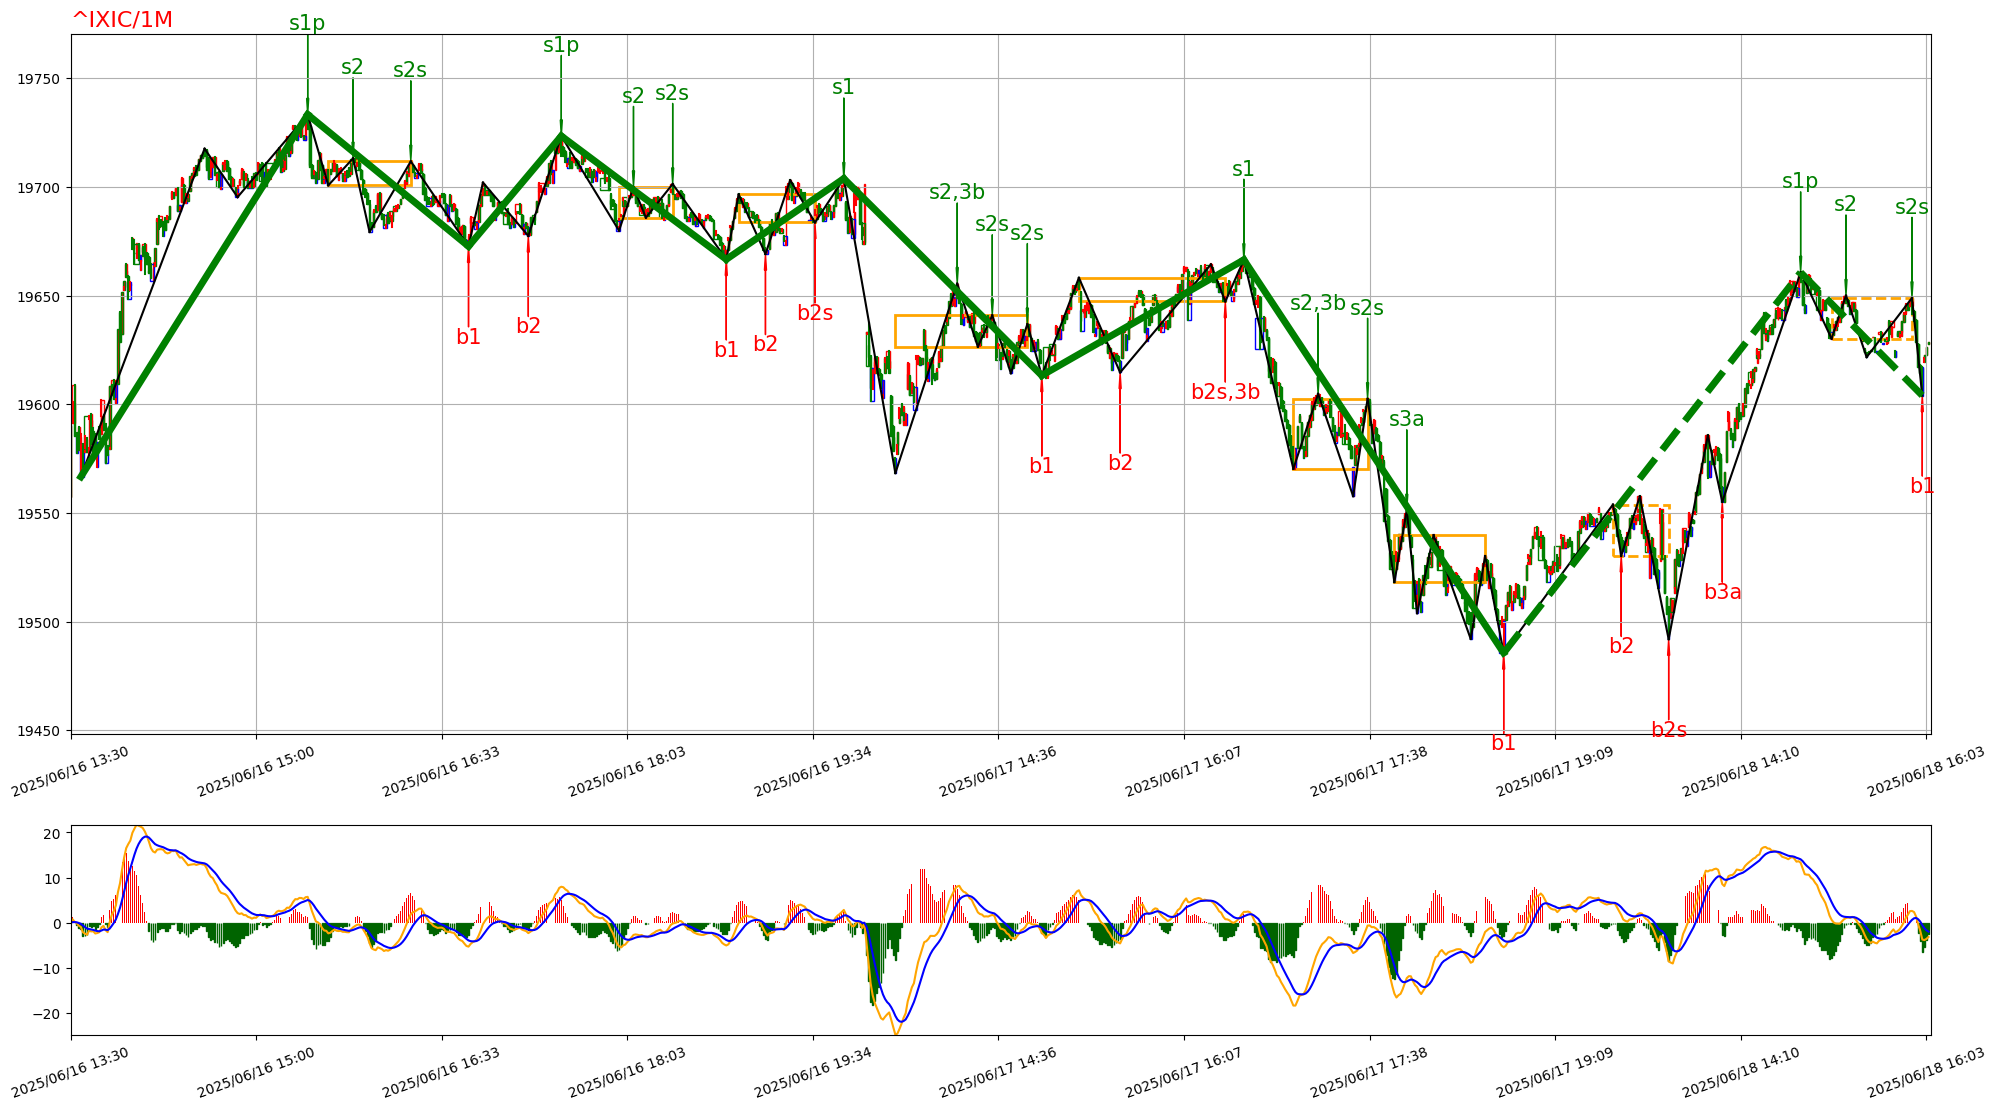

In [ ]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

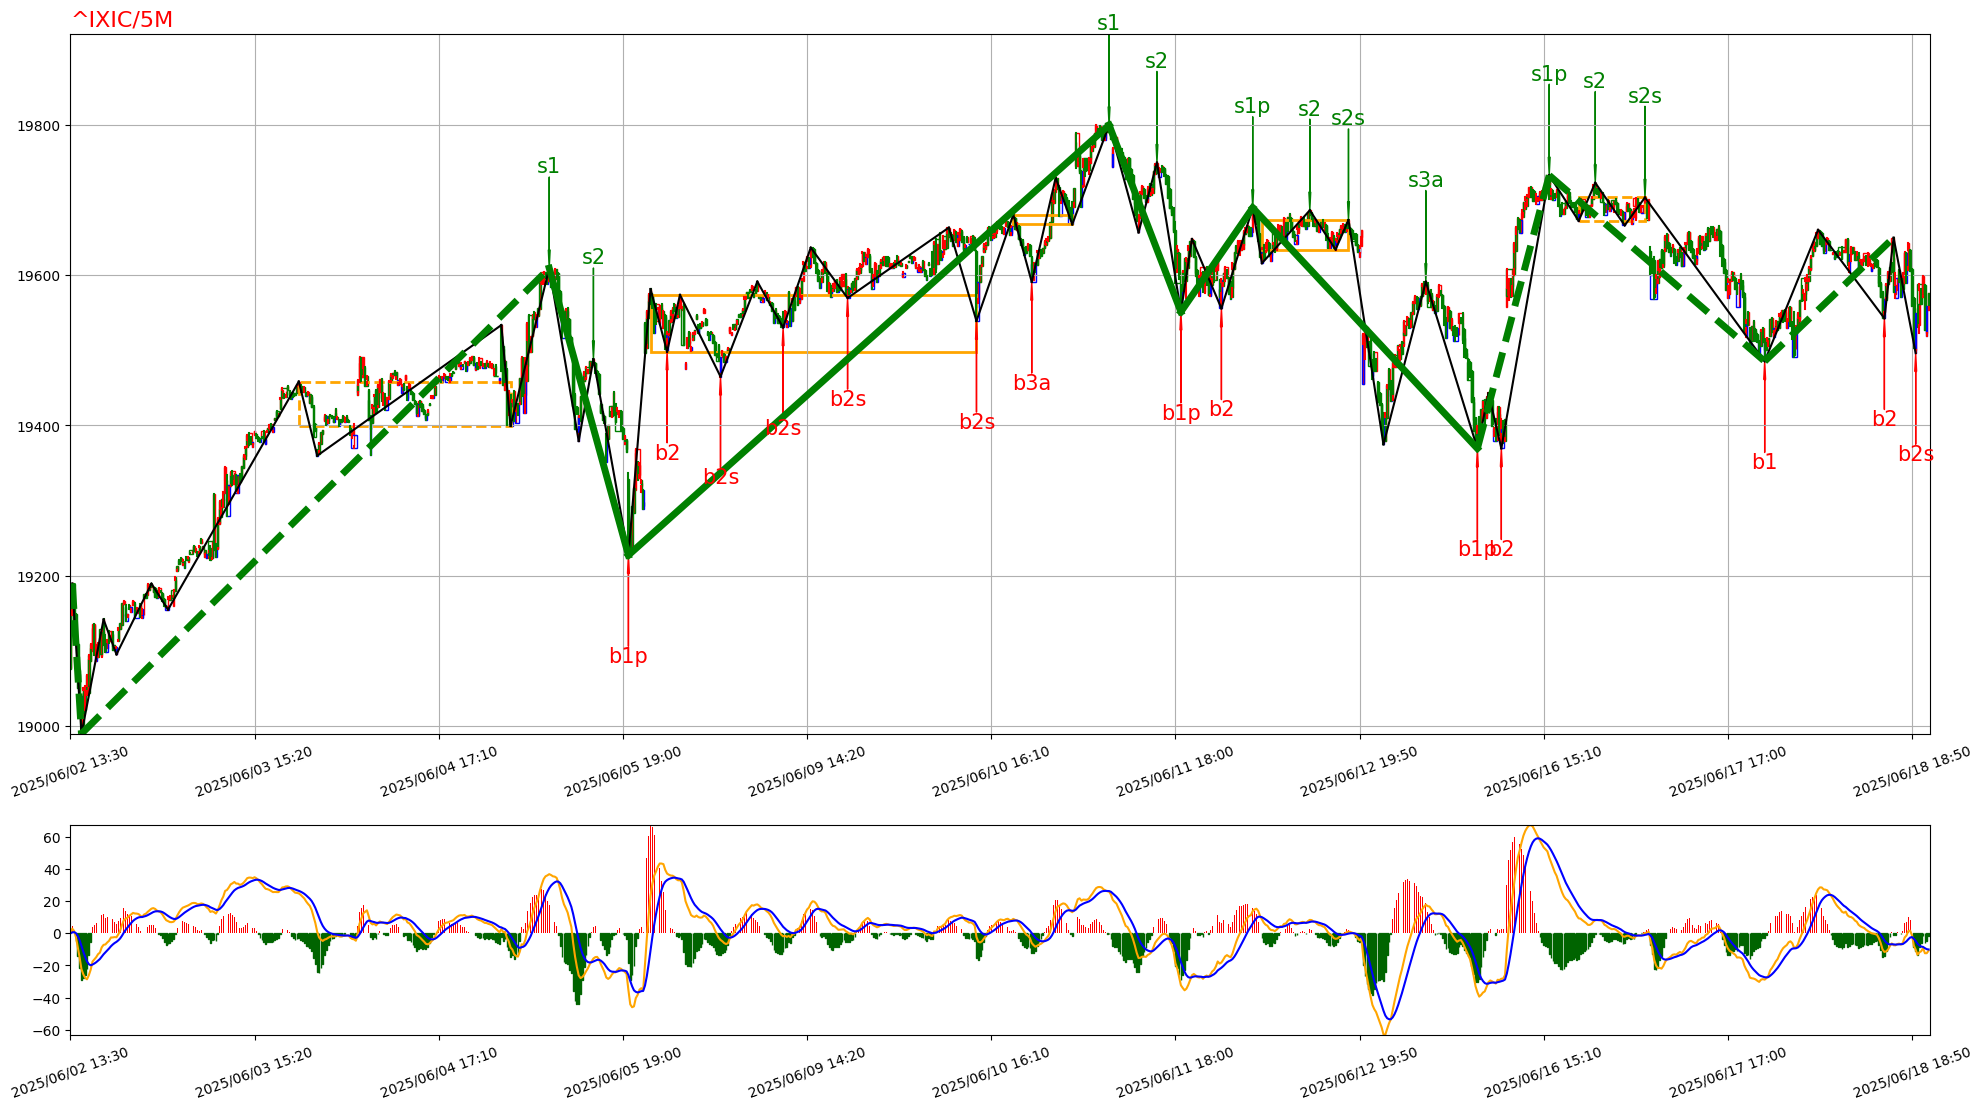

In [ ]:
code = "^IXIC"
#begin_time = "2024-09-25"
begin_time = "2025-06-01"
#end_time = "2025-04-01"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_1M]

config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": True,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

# plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
# plot_driver.save2img("./NVDA5m.png")
# plot_driver.figure.show()

from Plot.AnimatePlotDriver import CAnimateDriver
anim = CAnimateDriver(chan, plot_config=plot_config, plot_para=plot_para)
#anim.figure.show()

In [6]:
from utils.export_bs_features import export_bs_feature_files_by_type
export_bs_feature_files_by_type(chan, KL_TYPE.K_60M, "./output/NVDA_60m_bs_types")


KeyError: <KL_TYPE.K_60M: 14>

In [ ]:
from utils.export_bs_features import export_bs_feature_files_by_type
from Chan import CChan
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
import pandas as pd
from ChanConfig import CChanConfig
import yfinance as yf
import os

# === Example ticker lists ===
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].tolist()
nasdaq100 = yf.Tickers(" ".join([
    "AAPL MSFT NVDA AMD GOOGL AMZN TSLA META NFLX INTC AVGO QCOM TXN MU ADI ORCL IBM"
])).tickers.keys()
dowjones = ["AAPL", "MSFT", "V", "UNH", "JNJ", "WMT", "JPM", "HD", "PG"]

# === Unified + deduplicated ===
tickers = sorted(set(sp500 + list(nasdaq100) + dowjones))
begin_time = "2025-06-07"
end_time = None
lv_list = [KL_TYPE.K_1M]
lv = KL_TYPE.K_1M
data_src = DATA_SRC.YAHOO_FINANCE
autype = AUTYPE.QFQ

# === 配置参数 ===
config = CChanConfig({
    "cal_demark": True,
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "cal_rsl": True,
    "cal_demand_index": True,
    "cal_adline": True,
    "cal_bb_vals": True,
    "cal_kc_vals": True,
    "cal_starc_vals": True,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})

# === 输出主目录 ===
#main_output_dir = "./output/yfinance_day_bs_by_type"
main_output_dir = "./output/yfinance_1m_bs_by_type_06/13"
os.makedirs(main_output_dir, exist_ok=True)

# === 批量处理 ===
# for code in tickers:
#     try:
#         print(f"\n[⏳] Processing: {code}")
#         chan = CChan(
#             code=code,
#             begin_time=begin_time,
#             end_time=end_time,
#             data_src=data_src,
#             lv_list=lv_list,
#             config=config,
#             autype=autype
#         )

#         output_dir = os.path.join(main_output_dir, f"{code}")
#         export_bs_feature_files_by_type(chan, lv, output_dir)

#     except Exception as e:
#         print(f"[❌] Error processing {code}: {e}")


